In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [7]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [8]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [11]:
df['sex'] = df['sex'].map({'female':0, 'male':1})
df['smoker'] = df['smoker'].map({'no':0, 'yes': 1})

In [12]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [13]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)
df = df.join(pd.DataFrame(ohe.fit_transform(df[['region']]),columns=ohe.categories_))

In [14]:
df.head()

,age,sex,bmi,children,smoker,region,charges,"(northeast,)","(northwest,)","(southeast,)","(southwest,)"
0,19,0,27.900,0,1,southwest,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,southeast,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,southeast,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,northwest,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,northwest,3866.85520,0.0,1.0,0.0,0.0


In [15]:
df.columns = ['age','sex','bmi','children','smoker','region','charges','northeast','northwest','southeast','southwest']

In [16]:
df.head()

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,southeast,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,southeast,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,northwest,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,northwest,3866.85520,0.0,1.0,0.0,0.0


In [17]:
df = df.drop(columns=['region'])

In [18]:
df.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,3866.85520,0.0,1.0,0.0,0.0


In [19]:
X = df.drop(columns=['charges'])
y = df['charges']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=45)

In [21]:
X_train.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'northeast', 'northwest',
       'southeast', 'southwest'],
      dtype='object')

In [22]:
lr = LinearRegression()
lr.fit(X_train, y_train)

svm = SVR()
svm.fit(X_train, y_train)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

gr = GradientBoostingRegressor()
gr.fit(X_train, y_train)

GradientBoostingRegressor()

In [23]:
lr_pred = lr.predict(X_test)
svm_pred = svm.predict(X_test)
rf_pred = rf.predict(X_test)
gr_pred = gr.predict(X_test)

In [24]:
pred_data = pd.DataFrame({'Actual':y_test,'lr_pred':lr_pred,'svm_pred':svm_pred,'rf_pred':rf_pred,'gr_pred':gr_pred})

In [25]:
pred_data

,Actual,lr_pred,svm_pred,rf_pred,gr_pred
910,2639.04290,3433.690223,9327.762379,3549.185940,3394.172945
823,8219.20390,9505.194597,9427.557375,11696.830191,10074.538887
677,46130.52650,39600.353256,9502.624803,47042.680692,45150.197658
559,1646.42970,4551.954764,9323.866601,1696.625389,3868.620186
1169,6112.35295,9083.153015,9392.556107,6202.495669,6192.731066
...,...,...,...,...,...
926,2913.56900,1028.205669,9320.663709,6852.990284,5453.795154
527,9861.02500,9652.342169,9461.387540,12819.328868,10907.740293
766,8062.76400,10811.514951,9444.580386,9031.013776,9935.223666
611,6571.54400,9619.074129,9398.160516,6694.993408,6680.499271


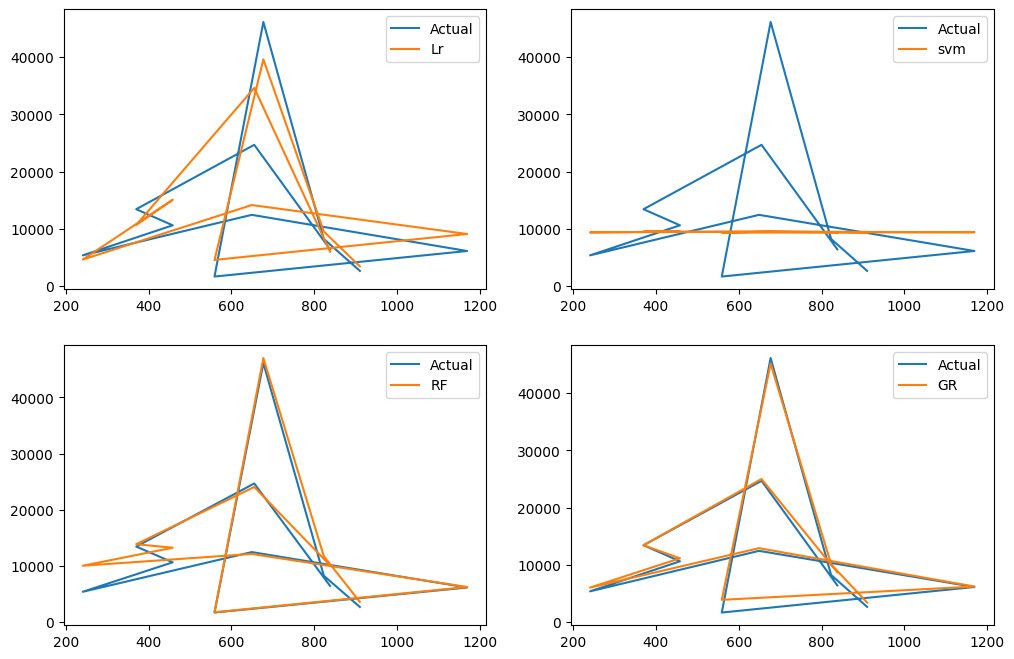

In [26]:
plt.figure(figsize=(12, 8))  # Set figure size first

plt.subplot(221)  # Define the first subplot in a 2x2 grid
plt.plot(pred_data['Actual'].iloc[0:11], label='Actual')
plt.plot(pred_data['lr_pred'].iloc[0:11], label='Lr')
plt.legend()


plt.subplot(222)  
plt.plot(pred_data['Actual'].iloc[0:11], label='Actual')
plt.plot(pred_data['svm_pred'].iloc[0:11], label='svm')
plt.legend()


plt.subplot(223)  
plt.plot(pred_data['Actual'].iloc[0:11], label='Actual')
plt.plot(pred_data['rf_pred'].iloc[0:11], label='RF')
plt.legend()


plt.subplot(224)  
plt.plot(pred_data['Actual'].iloc[0:11], label='Actual')
plt.plot(pred_data['gr_pred'].iloc[0:11], label='GR')
plt.legend()

In [27]:
lr_score = r2_score(y_test, lr_pred)
svm_score = r2_score(y_test, svm_pred)
rf_score = r2_score(y_test, rf_pred)
gr_score = r2_score(y_test, gr_pred)

In [28]:
print(lr_score, svm_score, rf_score, gr_score)

0.7110653571797567 -0.08127130357053525 0.830900346742432 0.8457808494103779


In [29]:
data1 = {
    'age':40,
    'sex':1,
    'bmi':40.30,
    'children':4,
    'smoker':1,
    'northeast':0.,
    'northwest':1.,
    'southeast':0.,
    'southwest':0.
}
df_ = pd.DataFrame(data1,index=[0])
# ['age', 'sex', 'bmi', 'children', 'smoker', 'northeast', 'northwest',
#        'southeast', 'southwest'],
df_

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
0,40,1,40.3,4,1,0.0,1.0,0.0,0.0


In [30]:
new_pred = gr.predict(df_)
new_pred

array([42977.50697936])

In [31]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'northeast',
       'northwest', 'southeast', 'southwest'],
      dtype='object')